In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Setting start and end time for stock data read
start = dt.datetime(2014, 1, 1)
end = dt.datetime(2024, 12, 31)

In [3]:
# Downloading stock data from Yahoo Finance
BAC = yf.download ("BAC", start, end) # Bank of America
C = yf.download("C", start, end) # CitiGroup
GS = yf.download("GS", start, end) # Goldman Sachs
JPM = yf.download("JPM", start, end) # JPMorgan Chase
MS = yf.download("MS", start, end) # Morgan Stanley
WFC = yf.download("WFC", start, end) # Wells Fargo

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'] # Step 1 to concatenate in one data frame
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info'] # Setting columns names
print(bank_stocks.head())
print(bank_stocks.columns)

Bank Ticker        BAC                                                     \
Stock Info        Open       High        Low  Close  Adj Close     Volume   
Date                                                                        
2014-01-02   15.690000  16.160000  15.680000  16.10  13.049139  148709900   
2014-01-03   16.270000  16.500000  16.230000  16.41  13.300397  129921800   
2014-01-06   16.629999  16.730000  16.559999  16.66  13.503022  114431300   
2014-01-07   16.770000  16.790001  16.450001  16.50  13.373343  110605100   
2014-01-08   16.670000  16.690001  16.520000  16.58  13.438184  101036400   

Bank Ticker          C                                   ...         MS  \
Stock Info        Open       High        Low      Close  ...        Low   
Date                                                     ...              
2014-01-02   52.029999  52.400002  51.810001  52.270000  ...  30.980000   
2014-01-03   52.389999  53.470001  52.310001  53.400002  ...  31.129999   
2014-01-

In [5]:
# Creating a different data set calculating the percent change in closing
returns = pd.DataFrame()
for ticks in tickers:
    returns[ticks+ ' Return'] = bank_stocks[ticks]['Close'].pct_change()
print(returns.head())

            BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2014-01-02         NaN       NaN        NaN         NaN        NaN         NaN
2014-01-03    0.019255  0.021619   0.007123    0.007731   0.015469    0.007108
2014-01-06    0.015235  0.007678   0.006848    0.005796   0.003491    0.001764
2014-01-07   -0.009604  0.006876  -0.006021   -0.011525  -0.003163   -0.000440
2014-01-08    0.004848  0.011628   0.000841    0.009431   0.001269    0.011454


In [6]:
# Understanding highest and lowest returns dates and amount
worst_returns = pd.DataFrame({'worst_return': returns.min(),
                              'Date': returns.idxmin()})
print(worst_returns)

best_return = pd.DataFrame({'best_return': returns.max(),
                            'Date': returns.idxmax()})
print(best_return)

            worst_return       Date
BAC Return     -0.153973 2020-03-16
C Return       -0.192986 2020-03-16
GS Return      -0.127053 2020-03-16
JPM Return     -0.149649 2020-03-16
MS Return      -0.156000 2020-03-16
WFC Return     -0.158676 2020-03-12
            best_return       Date
BAC Return     0.177962 2020-03-13
C Return       0.179843 2020-03-13
GS Return      0.175803 2020-03-13
JPM Return     0.180125 2020-03-13
MS Return      0.197700 2020-03-13
WFC Return     0.145347 2020-03-24


In [7]:
# Standard Deviation for Returns Dataset
# returns['Year'] = returns['Date'].datetime.year # Here I was getting an error, so had to check the dataset again and columns

# all_columns = returns.columns # 'Date' column did not appear so need to set that first
# print(all_columns)

# Resetting 'Date' index and adding 'Year' column
returns2 = pd.DataFrame(returns) 
returns2.reset_index(inplace = True)
returns2['Year'] = returns2['Date'].dt.year
print(returns2.columns)

returns_std = returns2.drop(columns = 'Date', inplace = True)
returns_std = returns2.groupby('Year').std()
print(returns_std)

# We can see a lot more volatility for all stocks in 2020 

Index(['Date', 'BAC Return', 'C Return', 'GS Return', 'JPM Return',
       'MS Return', 'WFC Return', 'Year'],
      dtype='object')
      BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Year                                                                    
2014    0.013487  0.012898   0.010929    0.011284   0.013673    0.008838
2015    0.016163  0.015289   0.014046    0.014017   0.016249    0.012591
2016    0.020231  0.020036   0.016893    0.015624   0.020527    0.015081
2017    0.013507  0.011129   0.012423    0.010176   0.013184    0.011178
2018    0.015616  0.015093   0.016175    0.013879   0.017187    0.014804
2019    0.014566  0.015354   0.014890    0.011869   0.014701    0.012450
2020    0.036933  0.042502   0.032929    0.034272   0.036164    0.038573
2021    0.016056  0.016366   0.015857    0.013441   0.016402    0.021178
2022    0.020498  0.021097   0.018670    0.018911   0.020213    0.021520
2023    0.016941  0.016002   0.015227    0.013112   0.016307    

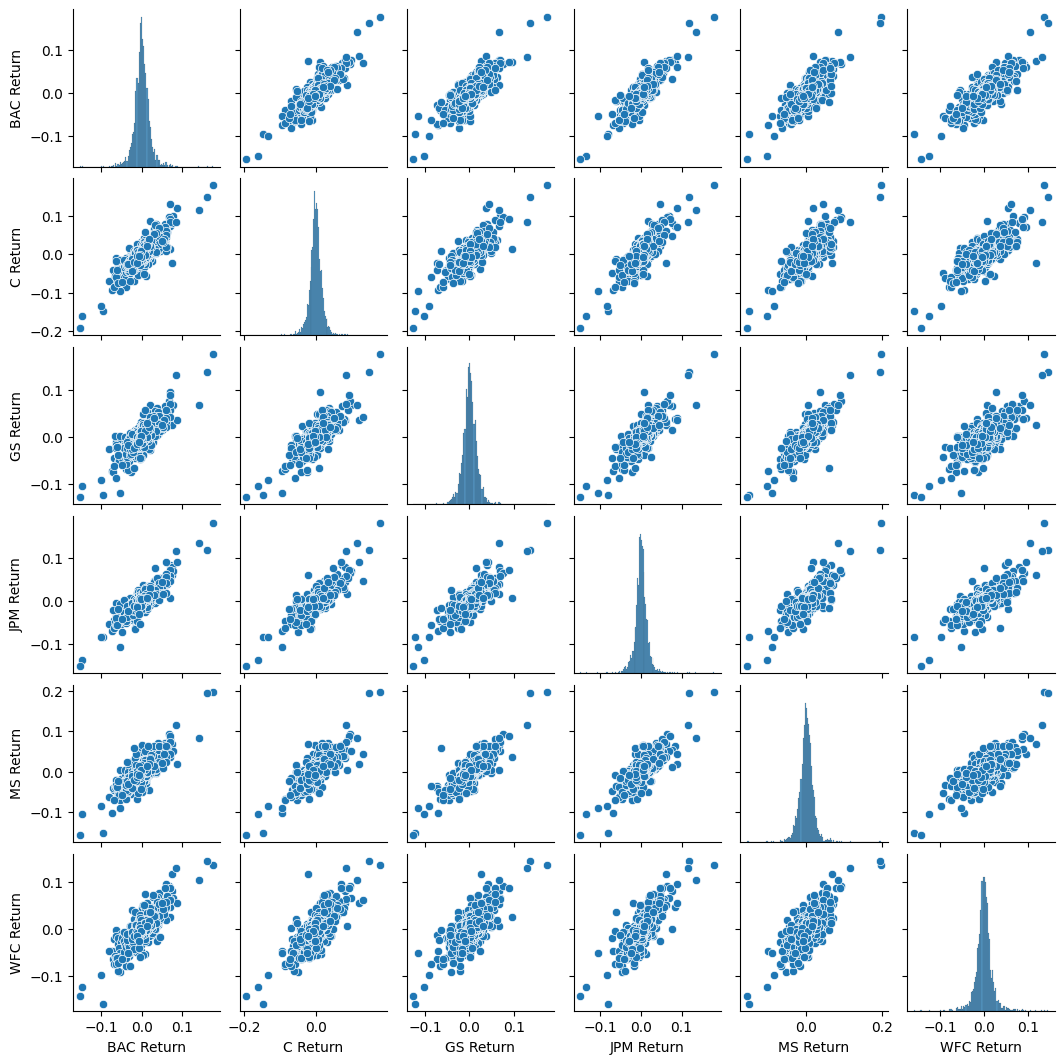

In [8]:
# Exploring corr between data points and trying to make out any outliers.
sns.pairplot(returns, height=1.8, dropna = True)

# No surprises and no anomalies detected

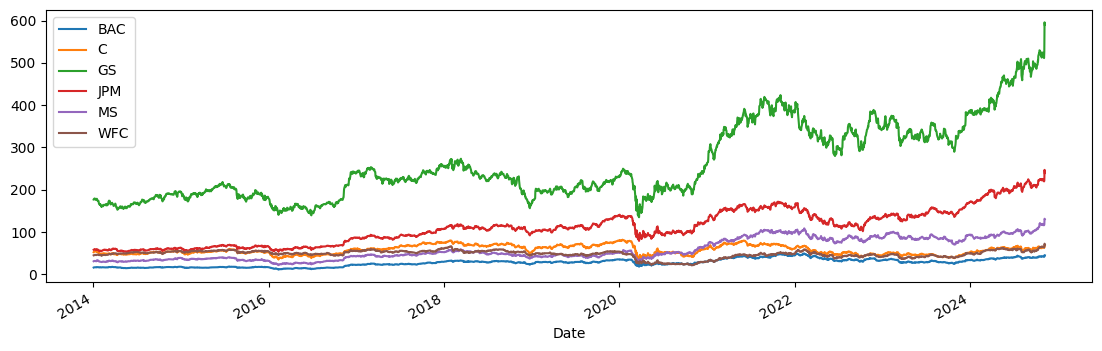

In [9]:
# Visualizing stock close over time
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(13.5,4), label = tick)
plt.legend()